In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import pickle
import skill_metrics as sm

In [2]:
#Load Data
greenbears = pd.read_csv('phenology-2021-03-08-greenbears_stl.csv')
PEG = pd.read_csv('preds.csv')
PEG_rfr = pd.read_csv('prediction_0325_RFR.csv')
EDM = pd.read_csv('phenology-2021-03-08-UCSC_P_EDM.csv')
Obs = pd.read_csv('https://data.ecoforecast.org/targets/phenology/phenology-targets.csv.gz')

In [3]:
site_names = Obs['siteID'].unique()
site_names

array(['HARV', 'BART', 'SCBI', 'STEI', 'UKFS', 'GRSM', 'DELA', 'CLBJ'],
      dtype=object)

In [4]:
#Define a funtion to extract mean for specific site. 
def extract_site_mean(data, target):
    if 'statistic' in data.columns:
        data = data[(data['siteID']==target) & (data['statistic']=='mean')]
    else:
        data = data[(data['siteID']==target)]
    data = data.set_index("time")
    return data

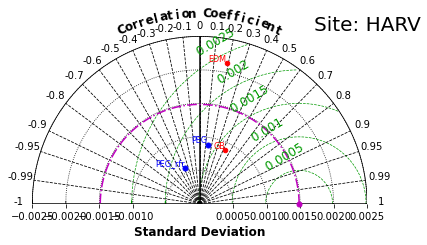

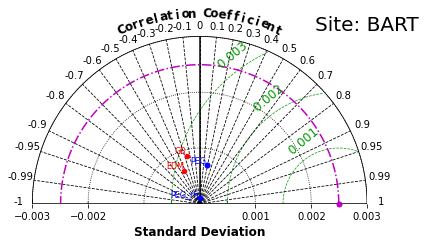

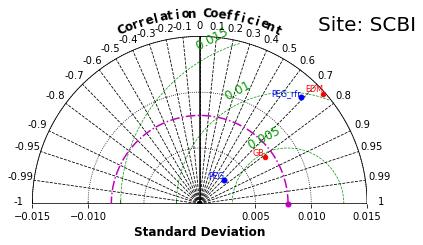

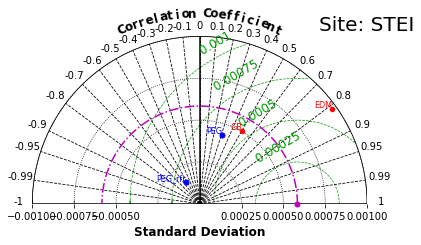

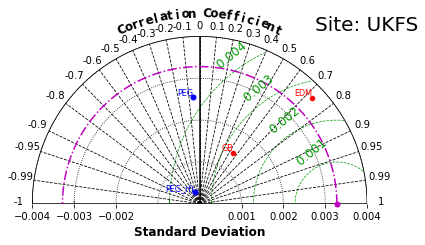

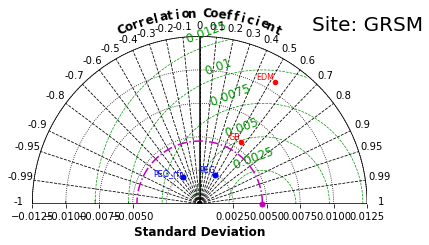

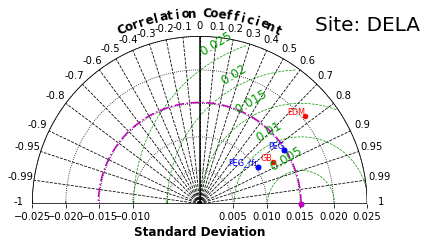

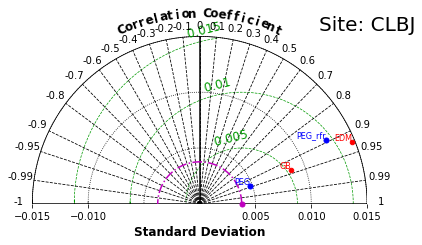

In [49]:
#Creat plot grid
#_, ax_grid = plt.subplots(
        #nrows=4, ncols=2, sharex=True, sharey=True,
        #figsize=(3*3, 5*3))

for site in site_names:
    
    #Extract mean
    PEG_site = extract_site_mean(PEG, site)
    PEG_rfr_site = extract_site_mean(PEG_rfr, site)
    GB_site = extract_site_mean(greenbears, site)
    EDM_site = extract_site_mean(EDM, site)
    Obs_site = extract_site_mean(Obs, site).dropna()
    
    #Calculate statistics for taylor diagram
    n = 35 #Choose first 35 elements in preditions and the last 35 element in observation. 
    
#     PEG_taylor_stats = sm.taylor_statistics(PEG_site['gcc_90'][:n],Obs_site['gcc_90'][-n:])
#     PEG_rfr_taylor_stats = sm.taylor_statistics(PEG_rfr_site['gcc_90'][:n],Obs_site['gcc_90'][-n:])
#     GB_taylor_stats = sm.taylor_statistics(GB_site['gcc_90'][:n],Obs_site['gcc_90'][-n:])
#     EDM_taylor_stats = sm.taylor_statistics(EDM_site['gcc_90'][:n],Obs_site['gcc_90'][-n:])
#     Obs_taylor_stats = sm.taylor_statistics(Obs_site['gcc_90'][:n],Obs_site['gcc_90'][-n:])
    
    PEG_taylor_stats = sm.taylor_statistics(PEG_site['gcc_90'][GRSM_whole.index],Obs_site['gcc_90'][GRSM_whole.index])
    PEG_rfr_taylor_stats = sm.taylor_statistics(PEG_rfr_site['gcc_90'][GRSM_whole.index],Obs_site['gcc_90'][GRSM_whole.index])
    GB_taylor_stats = sm.taylor_statistics(GB_site['gcc_90'][GRSM_whole.index],Obs_site['gcc_90'][GRSM_whole.index])
    EDM_taylor_stats = sm.taylor_statistics(EDM_site['gcc_90'][GRSM_whole.index],Obs_site['gcc_90'][GRSM_whole.index])
    Obs_taylor_stats = sm.taylor_statistics(Obs_site['gcc_90'][GRSM_whole.index],Obs_site['gcc_90'][GRSM_whole.index])
    
    #Store statstics for Taylor Diagram for other teams/competitor
    sdev = np.array([PEG_taylor_stats['sdev'][0],
                GB_taylor_stats['sdev'][1], 
                EDM_taylor_stats['sdev'][1]])

    crmsd = np.array([PEG_taylor_stats['crmsd'][0], 
                GB_taylor_stats['crmsd'][1], 
                EDM_taylor_stats['crmsd'][1]])

    ccoef = np.array([PEG_taylor_stats['ccoef'][0],
                GB_taylor_stats['ccoef'][1], 
                EDM_taylor_stats['ccoef'][1]])
    
    #Set label for other teams. PEG will be added as a second layer later.
    label = ['Obs', 'GB', 'EDM']  

    #Draw Taylor Diagram for other teams 
    plt.title(label = "Site: " + str(site), fontsize=20, x=1, y=1)
    sm.taylor_diagram(sdev, crmsd, ccoef, numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r', markerSize = 9, 
                titleRMS = 'off', widthRMS = 0.7,
                titleSTD='on', showlabelsSTD='on', widthSTD = 0.8,
                #titleOBS = 'Obs', 
                  styleOBS = '-.', markerobs = 'o',
                colCOR = 'k', styleCOR = '--', widthCOR = 0.8)
    
    
    
    #Store statstics for Taylor Diagram for PEG
    sdev_PEG = np.array([PEG_taylor_stats['sdev'][0],
                PEG_taylor_stats['sdev'][1],
                PEG_rfr_taylor_stats['sdev'][1]])

    crmsd_PEG = np.array([PEG_taylor_stats['crmsd'][0], 
                PEG_taylor_stats['crmsd'][1],
                PEG_rfr_taylor_stats['crmsd'][1]])

    ccoef_PEG = np.array([PEG_taylor_stats['ccoef'][0],
                PEG_taylor_stats['ccoef'][1],
                PEG_rfr_taylor_stats['ccoef'][1]])
    
    #Set Label for PEG models 
    label = ['Non-Dimensional Observation', 'PEG', 'PEG_rfr']

    #Second layer for PEG. Comment in function: overlay = 'on'
    sm.taylor_diagram(sdev_PEG,crmsd_PEG,ccoef_PEG, overlay = 'on',  titleSTD='on',
                      markerLabel = label, markerLabelColor = 'b',
                      markerColor = 'b')
    
    
    #Uncomment these two lines if want to save 
    #plt.savefig('../Taylor_Diagrams/taylor_'+str(site)+'.png')
    #plt.close()
    
    plt.show()

In [33]:
#Examine the correctness of GRSM
PEG_GRSM = extract_site_mean(PEG, site)
PEG_rfr_GRSM = extract_site_mean(PEG_rfr, site)
Obs_GRSM = extract_site_mean(Obs, site).dropna()

GRSM_whole = pd.concat([Obs_GRSM['gcc_90'], PEG_GRSM['gcc_90'], PEG_rfr_GRSM['gcc_90']], 
                       axis=1, 
                       join="inner")
GRSM_whole.columns = ['Obs', 'simple', 'rfr']

In [50]:
Obs_GRSM['gcc_90'][GRSM_whole.index]

time
2021-03-25    0.32894
2021-03-26    0.32818
2021-03-27    0.32950
2021-03-28    0.32867
2021-03-29    0.32940
2021-03-30    0.33105
2021-03-31    0.32987
2021-04-01    0.33091
2021-04-02    0.33097
2021-04-03    0.33275
2021-04-04    0.33517
2021-04-05    0.33650
2021-04-06    0.33900
2021-04-07    0.33994
Name: gcc_90, dtype: float64

In [51]:
GRSM_whole

,Obs,simple,rfr
time,,,
2021-03-25,0.32894,0.329476,0.350448
2021-03-26,0.32818,0.330870,0.348615
2021-03-27,0.32950,0.329674,0.354533
2021-03-28,0.32867,0.330798,0.353622
2021-03-29,0.32940,0.333019,0.358168
2021-03-30,0.33105,0.335049,0.364308
2021-03-31,0.32987,0.336042,0.367398
2021-04-01,0.33091,0.335709,0.374441
2021-04-02,0.33097,0.336666,0.373124


array([[<AxesSubplot:xlabel='Obs', ylabel='Obs'>,
        <AxesSubplot:xlabel='simple', ylabel='Obs'>,
        <AxesSubplot:xlabel='rfr', ylabel='Obs'>],
       [<AxesSubplot:xlabel='Obs', ylabel='simple'>,
        <AxesSubplot:xlabel='simple', ylabel='simple'>,
        <AxesSubplot:xlabel='rfr', ylabel='simple'>],
       [<AxesSubplot:xlabel='Obs', ylabel='rfr'>,
        <AxesSubplot:xlabel='simple', ylabel='rfr'>,
        <AxesSubplot:xlabel='rfr', ylabel='rfr'>]], dtype=object)

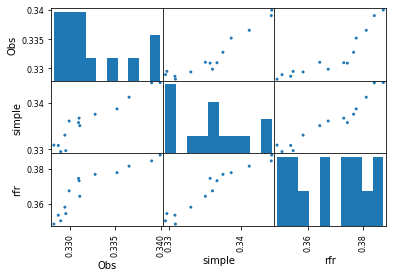

In [36]:
pd.plotting.scatter_matrix(GRSM_whole, alpha=1)

In [53]:
np.corrcoef(GRSM_whole.Obs, GRSM_whole.rfr)

array([[1.        , 0.89089178],
       [0.89089178, 1.        ]])